In [122]:
%run featureEngineering.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Missing values per column after cleaning:

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal    

In [123]:

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC




In [124]:
data_encoded.target.value_counts(normalize=True)

target
1.0    0.544554
0.0    0.455446
Name: proportion, dtype: float64

In [125]:

# #  Feature Engineering

# cat_cols = data.select_dtypes(include=['object']).columns
# num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# print("Categorical columns:", list(cat_cols))
# print("Numerical columns:", list(num_cols))

# # Encode categorical features using one-hot encoding
# df_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# print("\nShape after encoding:", df_encoded.shape)
# display(df_encoded.head())

# # Remove duplicates if any
# df_encoded = df_encoded.drop_duplicates()
data_encoded.shape


(303, 17)

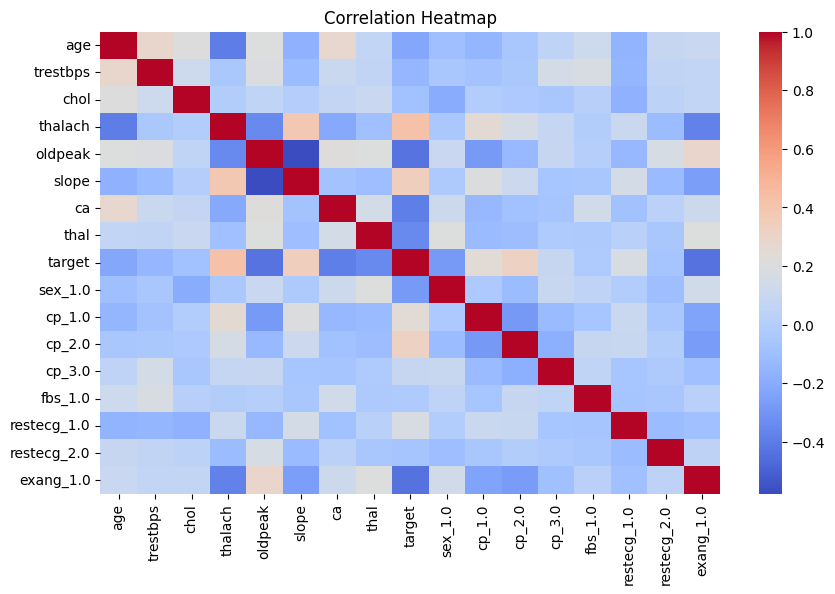

In [126]:

#  Correlation Analysis

plt.figure(figsize=(10,6))
sns.heatmap(data_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [127]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [128]:

# Split dataset into training and testing (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (242, 16)
Testing set size: (61, 16)


In [129]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:

#  Logistic Regression Model

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print(" Logistic Regression Results ")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


 Logistic Regression Results 
Accuracy: 0.8688524590163934

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        29
         1.0       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [131]:

#  Support Vector Machine (SVM)

svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print(" Support Vector Machine Results ")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


 Support Vector Machine Results 
Accuracy: 0.8852459016393442

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88        29
         1.0       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



C:\Users\kshit\AppData\Local\Temp\ipykernel_17700\2983680117.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Logistic Regression', 'SVM'], y=[acc_lr, acc_svm], palette='viridis')


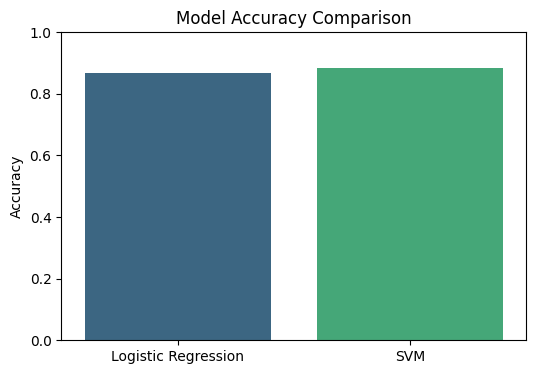

In [132]:

#  Compare Model Accuracies

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_svm = accuracy_score(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.barplot(x=['Logistic Regression', 'SVM'], y=[acc_lr, acc_svm], palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


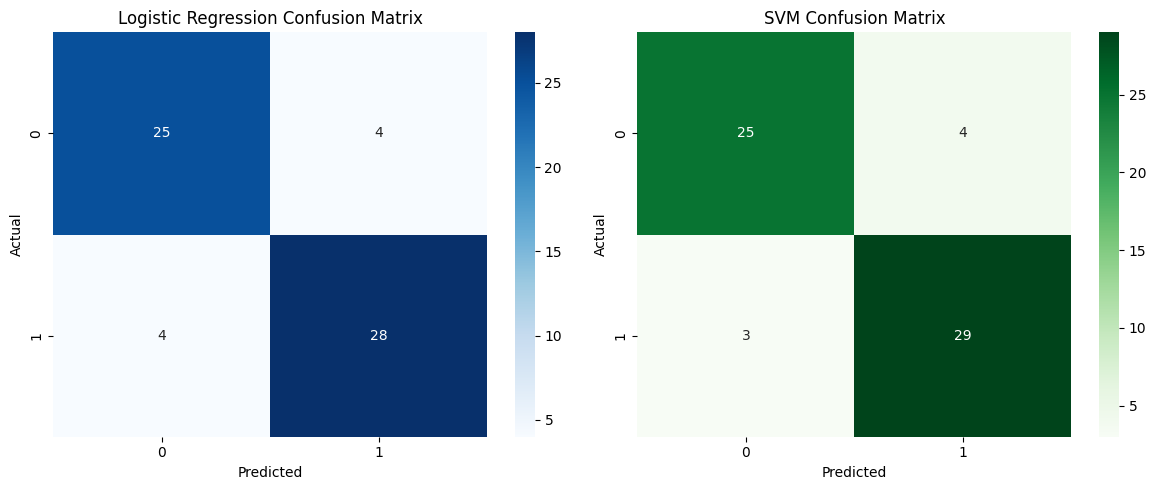

In [133]:

#  Confusion Matrices

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [134]:

#  Conclusion

print(" Summary")
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"SVM Accuracy: {acc_svm:.4f}")

if acc_lr > acc_svm:
    print("\n Logistic Regression performed slightly better.")
elif acc_svm > acc_lr:
    print("\n SVM performed slightly better.")
else:
    print("\n Both models performed equally well.")

print("\nConclusion:")
print("Both Logistic Regression and SVM models successfully classified disease presence.")
print("Feature engineering (encoding, scaling) improved model performance.")
print("Future improvements could include hyperparameter tuning and feature selection.")


 Summary
Logistic Regression Accuracy: 0.8689
SVM Accuracy: 0.8852

 SVM performed slightly better.

Conclusion:
Both Logistic Regression and SVM models successfully classified disease presence.
Feature engineering (encoding, scaling) improved model performance.
Future improvements could include hyperparameter tuning and feature selection.
